<h1>Aplicando Machine Learning ao desastre</h1>

<h4><a href='https://www.youtube.com/watch?v=Z5kqCBDcMnQ'>Conteúdo de auxilio de Krish Narukulla</a>

<h3>Antes de qualquer coisa, devo explicar uma coisa. A ferramenta Sckit Learn não funciona com dados literais('A', 'B'), sendo necessário que todas a váriaveis estejam em formato numérico para que assim evite problemas.</h3>

In [1]:

#Bibliotecas de maninupação de dados
import pandas as pd #biblioteca para criação de DataFrames
import numpy as np #algebra

#bibliotecas de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Bibliotecas de visualização

import seaborn as sns #graficos mais atraentes
import matplotlib.pyplot as plt #plotagem
sns.set_style('whitegrid')
import random #seleção de valores aleatórios para plotagem
%matplotlib inline

In [2]:
#lendo o arquivo
df1 = pd.read_csv("data/train.csv") 

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Limpando colunas que não afetam a análise</h3>

In [4]:
#df1.drop(['Ticket','Cabin','PassengerId'], axis=1, inplace = True)

In [5]:
y = df1.pop('Survived')

In [6]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
variaveisNumericas = list(df1.dtypes[df1.dtypes!= 'object'].index)

In [8]:
df1[variaveisNumericas].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [9]:
#tratando as celulas que não tem nenhum valor, iremos colocar a média das idades para preencher essas lacunas
df1['Age'].fillna(df1.Age.mean(), inplace = True)

In [10]:
model =  RandomForestClassifier(n_estimators=2000)

In [11]:
model.fit(df1[variaveisNumericas],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
treinoAcu = accuracy_score(y, model.predict(df1[variaveisNumericas]))
treinoAcu =  treinoAcu * 100
print("Acurácia do Treino",treinoAcu,"%")

Acurácia do Treino 100.0 %


In [13]:
dfTEste = pd.read_csv("data/test.csv") 

In [14]:
dfTEste[variaveisNumericas].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [15]:
dfTEste['Age'].fillna(dfTEste.Age.mean(), inplace = True)

In [16]:
dfTEste = dfTEste[variaveisNumericas].fillna(dfTEste.mean()).copy()

In [17]:
y_pred = model.predict(dfTEste[variaveisNumericas])

<h3>Criando o data frame com o resultado.</h3>

In [18]:
submissao = pd.DataFrame({
                        'PassengerID': dfTEste['PassengerId'],
                        'Survived': y_pred
                         })


In [19]:
submissao.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [20]:
submissao.to_csv('data/titanic.csv', index=False)

In [21]:
submissao['Survived'].count()

418

In [22]:
vivos = submissao[submissao['Survived'] == 1]

In [23]:
print("A quantidade de pessoas que conseguiram sobreviver é ", vivos.count())

A quantidade de pessoas que conseguiram sobreviver é  PassengerID    158
Survived       158
dtype: int64


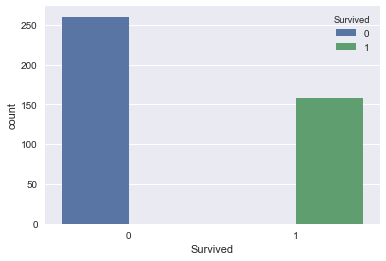

In [24]:
sns.set(style="darkgrid")
classePlot =  sns.countplot(data = submissao,x = 'Survived', hue='Survived')